In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
%matplotlib inline

In [ ]:
# Read the CSV file and store it in the variable divar_df
divar_df = pd.read_csv("/content/DivarHousePrice.csv")

In [ ]:
# Convert necessary columns to numeric data type
for column in divar_df.select_dtypes(include=['object']).columns:
    divar_df[column] = pd.to_numeric(divar_df[column], errors='coerce')

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Address' column to numeric data type
divar_df['Address'] = label_encoder.fit_transform(divar_df['Address'])

print(divar_df.dtypes)

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address         int64
Price         float64
Price(USD)    float64
dtype: object


In [ ]:
# Fill missing values in 'Area' column with 0
divar_df['Area'].fillna(0, inplace=True)
# Count remaining missing values in the DataFrame
divar_df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [ ]:
# Display the first few rows of the DataFrame
print(divar_df.head())

# Display information about the DataFrame
print(divar_df.info())

# Display descriptive statistics of the DataFrame
print(divar_df.describe())

# Display the shape of the DataFrame
print(divar_df.shape)


    Area  Room  Parking  Warehouse  Elevator  Address         Price  \
0   63.0     1     True       True      True        0  1.850000e+09   
1   60.0     1     True       True      True        0  1.850000e+09   
2   79.0     2     True       True      True        0  5.500000e+08   
3   95.0     2     True       True      True        0  9.025000e+08   
4  123.0     2     True       True      True        0  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3479 non-null   int64  
 6   Price       3479 non-null   float64
 7

In [ ]:
# Get the column names of the DataFrame
column_names = divar_df.columns

In [ ]:
# Assign 'Price' column values back to themselves (no change)
divar_df['Price'] = divar_df['Price'].values

In [ ]:
# تحلیل ویژگی‌ها
# بررسی و نمایش توزیع و روابط ویژگی‌ها
print(divar_df['Price'].describe())
print(divar_df['Room'].value_counts())
# و غیره


count    3.479000e+03
mean     5.359023e+09
std      8.099935e+09
min      3.600000e+06
25%      1.418250e+09
50%      2.900000e+09
75%      6.000000e+09
max      9.240000e+10
Name: Price, dtype: float64
Room
2    1961
3     732
1     673
4      70
5      33
0      10
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


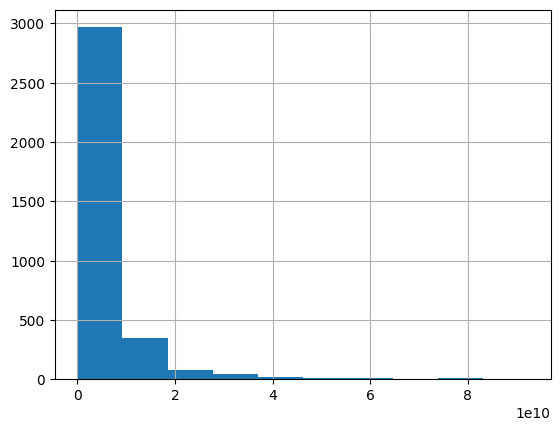

In [ ]:
# Plot histogram of 'Price' column
print(divar_df['Price'].hist())

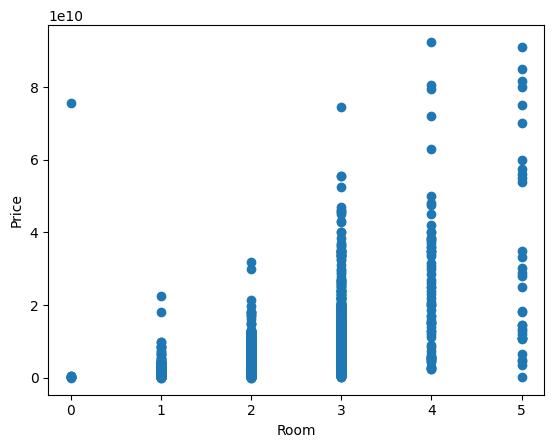

In [ ]:
# Plot scatter plot of 'Room' versus 'Price'
plt.scatter(divar_df['Room'], divar_df['Price'])
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

In [ ]:
x = divar_df[['Area', 'Room', 'Parking','Warehouse','Elevator','Address',]]
y = divar_df['Price']

In [ ]:
# Split the data into training and testing sets
# x: features, y: target variable
# test_size=0.2 means 20% of the data will be used for testing
# random_state=0 ensures reproducibility of the split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

In [ ]:
# Print the shapes of the training and testing data sets
print("xtrain shape : ", xtrain.shape)
print("xtest shape : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape : ", ytest.shape)

xtrain shape :  (2783, 6)
xtest shape :  (696, 6)
ytrain shape :  (2783,)
ytest shape :  (696,)


In [ ]:
# Create a Linear Regression model
# Fit the model using the training data
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# predicting the test set results
y_pred = regressor.predict(xtest)

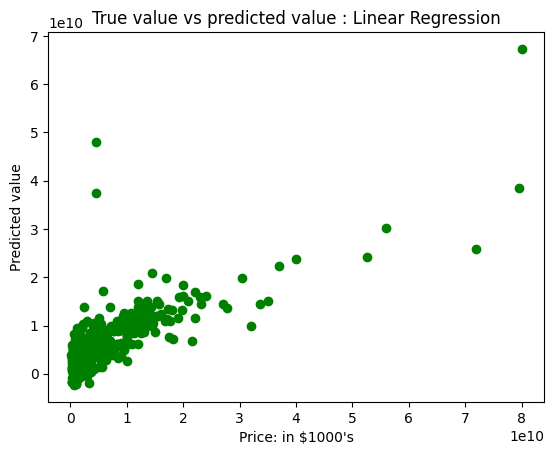

In [ ]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest,y_pred)

print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  2.328910237301624e+19
Mean Absolute Error :  2624730787.9828725


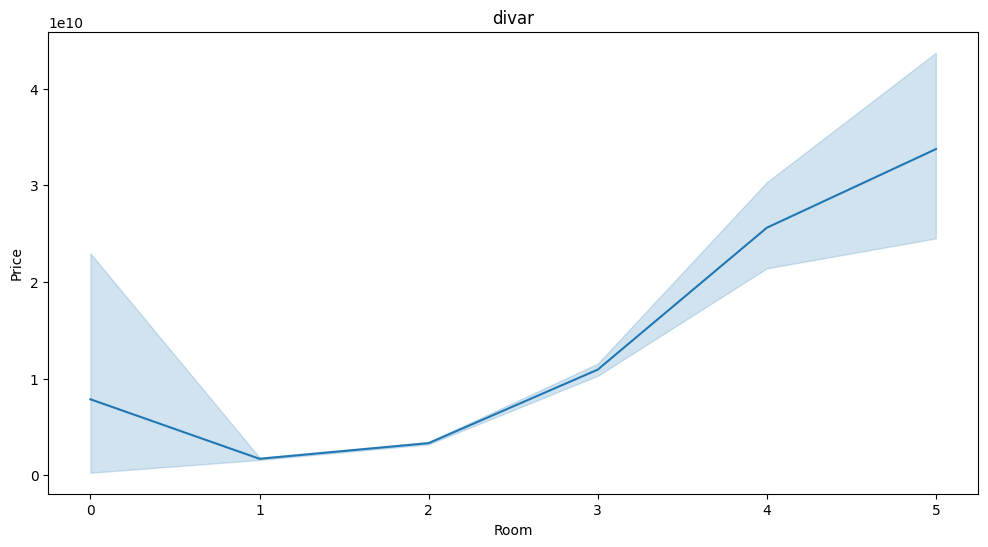

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot a line plot using seaborn
sns.lineplot(x='Room', y='Price', data=divar_df)

# Set title and labels for the plot
plt.title('divar')
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

In [ ]:
# Calculate correlation coefficients
correlation = divar_df['Price'].corr(divar_df['Area'])
print(correlation)
correlation = divar_df['Price'].corr(divar_df['Room'])
print(correlation)
correlation = divar_df['Price'].corr(divar_df['Parking'])
print(correlation)
correlation = divar_df['Price'].corr(divar_df['Warehouse'])
print(correlation)
correlation = divar_df['Price'].corr(divar_df['Elevator'])
print(correlation)
correlation = divar_df['Price'].corr(divar_df['Address'])
print(correlation)
correlation = divar_df['Price'].corr(divar_df['Price(USD)'])
print(correlation)


0.7200847957271111
0.567732485308067
0.19008579247170976
0.10936701152836407
0.11144627229798104
nan
0.9999999999999998


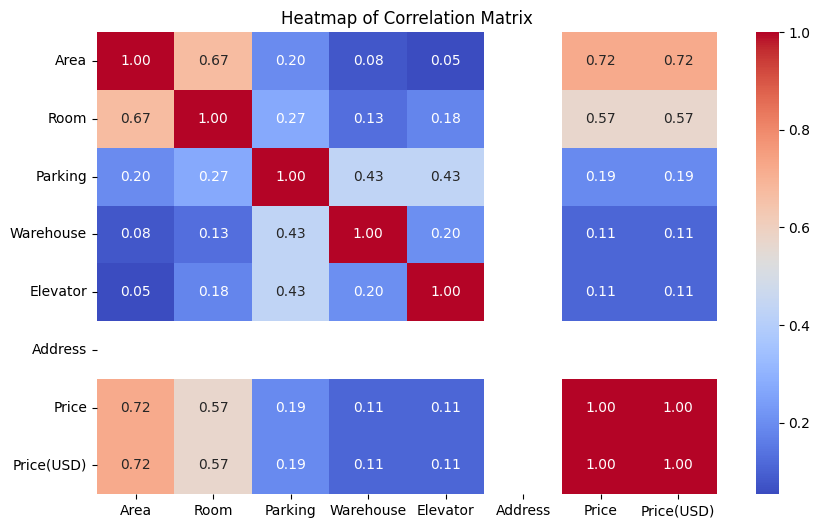

In [ ]:
#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(divar_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()
